In [2]:
import pandas as pd

cbb3 = pd.read_csv('cbb_trial1.csv', encoding='latin-1')
cbb3['TEAM'] = cbb3['TEAM'].str.replace('Ê', '')
cbb3['REC'] = cbb3['REC'].str.replace('Ð', '–')
cbb3 = cbb3.drop(cbb3.index[10695:], axis=0)
cbb3.reset_index(drop=True, inplace=True)
cbb3['SEED'] = None
cbb3['FINISH'] = None

# Iterate through the DataFrame
for index, row in cbb3.iterrows():
    if pd.notna(row['TEAM']) and 'seed' in row['TEAM']:
        # In this part, we extract SEED and FINISH information
        seed_part = row['TEAM'].split(' seed')[0].lstrip('Ê')  # We were getting an error saying we still had Ê before some integers, so we remove them with this line
        seed = int(seed_part) if seed_part.isdigit() else None  # Convert to integer, handling non-numeric values
        finish = row['TEAM'].split(',')[1]
        
        # Here, we update the values in the row above
        if index > 0:
            cbb3.at[index - 1, 'SEED'] = seed
            cbb3.at[index - 1, 'FINISH'] = finish

cbb3.reset_index(drop=True, inplace=True)
cbb3.drop('BARTHAG', axis=1, inplace=True)
cbb3[['WINS', 'LOSSES']] = cbb3['REC'].str.split('–', expand=True).apply(pd.to_numeric, errors='coerce')
cbb3['G'] = pd.to_numeric(cbb3['G'], errors='coerce')
cbb3.loc[:, 'ADJOE':'WAB'] = cbb3.loc[:, 'ADJOE':'WAB'].apply(pd.to_numeric, errors='coerce')
cbb3['SEED'] = pd.to_numeric(cbb3['SEED'], errors='coerce')
cbb3.to_csv('cbb_edited.csv')


In [3]:
df = pd.read_csv('cbb_edited.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(subset=['YEAR'])
df = df.dropna(subset=['FINISH'])
df['FINISH'] = df['FINISH'].str.strip()
df[df['FINISH'].astype(str) == 'R68']
filter = df['FINISH'] != 'R68'
df = df[filter]
df.to_csv('March_Madness.csv')

In [4]:
data = pd.read_csv('March_Madness.csv')
data['Is_Champ'] = data['FINISH'].apply(lambda x: 'Champion' if x == 'CHAMPS' else 'Non-Champion')

champ_stats = data.groupby('Is_Champ').agg({'ADJOE': ['mean', 'std'], 'ADJDE': ['mean', 'std'], 'EFG%': ['mean', 'std'], '2P%': ['mean', 'std'], '3P%': ['mean', 'std']})
champ_stats


ADJOE                ADJDE                 EFG%            \
                    mean       std       mean       std       mean       std   
Is_Champ                                                                       
Champion      119.786667  4.389739  91.000000  3.408603  53.713333  3.172396   
Non-Champion  110.693862  5.902339  95.693122  5.008694  52.091534  2.653554   

                    2P%                  3P%            
                   mean       std       mean       std  
Is_Champ                                                
Champion      52.553333  3.624296  37.393333  2.667387  
Non-Champion  51.176720  2.943567  35.869947  2.611652

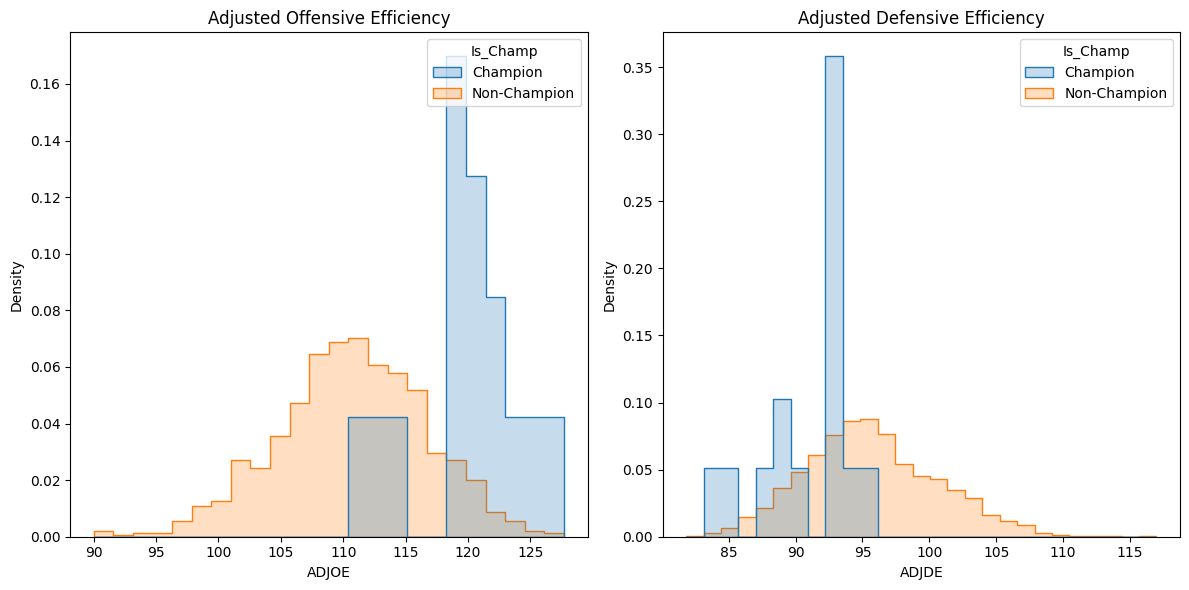

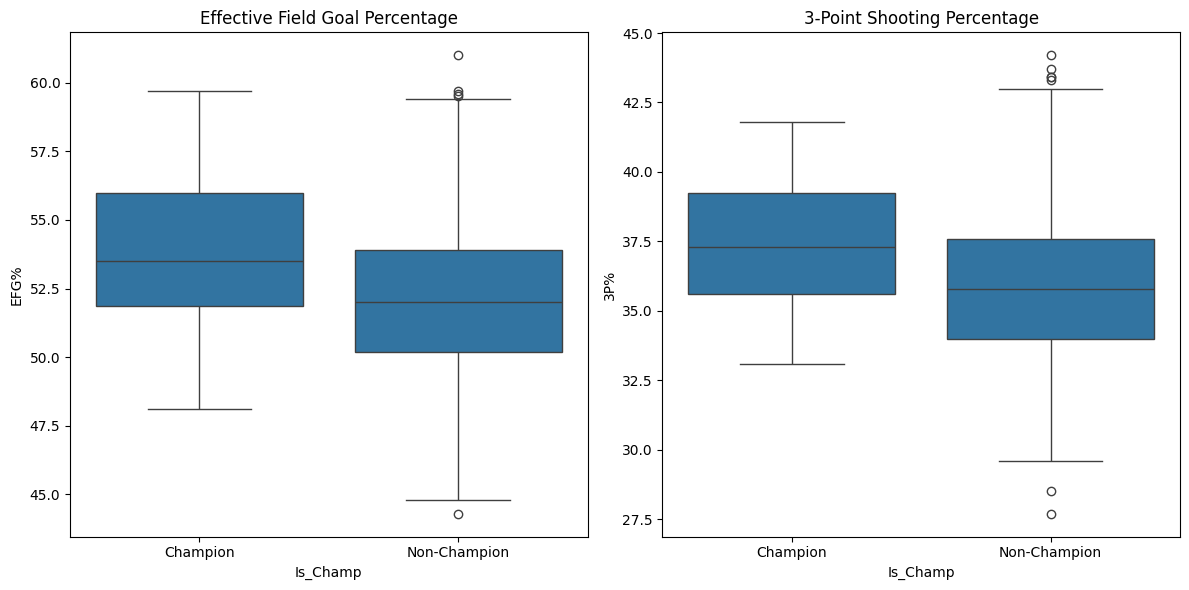

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='ADJOE', hue='Is_Champ', element='step', stat='density', common_norm=False)
plt.title('Adjusted Offensive Efficiency')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='ADJDE', hue='Is_Champ', element='step', stat='density', common_norm=False)
plt.title('Adjusted Defensive Efficiency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Is_Champ', y='EFG%', data=data)
plt.title('Effective Field Goal Percentage')

plt.subplot(1, 2, 2)
sns.boxplot(x='Is_Champ', y='3P%', data=data)
plt.title('3-Point Shooting Percentage')
plt.tight_layout()
plt.show()

In [8]:
def finish_to_numeric_corrected(finish):
    mapping = {'R64': 0, 'R32': 1, 'Sweet Sixteen': 2, 'Elite Eight': 3, 'Final Four': 4, 'Finals': 5, 'CHAMPS': 6}
    return mapping.get(finish, -1)  # Use -1 for any unexpected values

data['Finish_Numeric'] = data['FINISH'].apply(finish_to_numeric_corrected)


,Unnamed: 0,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,...,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,WINS,LOSSES,Is_Champ,Finish_Numeric


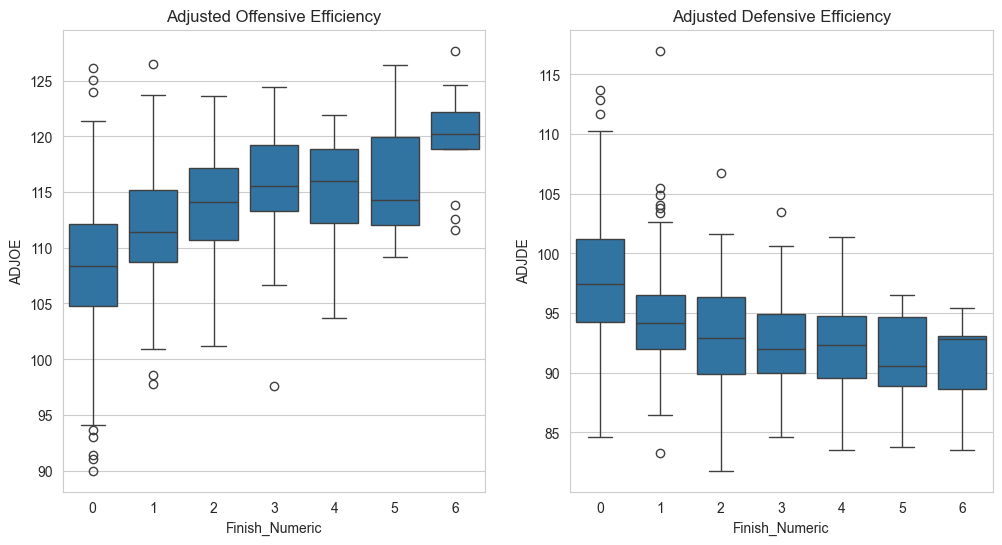

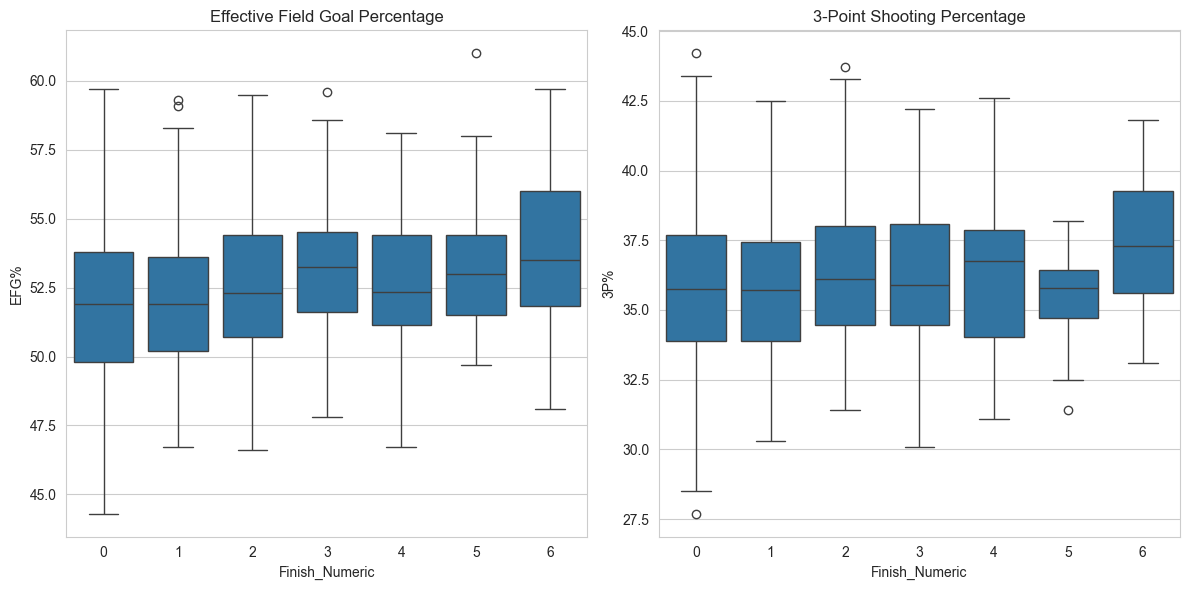

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Finish_Numeric', y='ADJOE', data=data)
plt.title('Adjusted Offensive Efficiency')

plt.subplot(1, 2, 2)
sns.boxplot(x='Finish_Numeric', y='ADJDE', data=data)
plt.title('Adjusted Defensive Efficiency')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Finish_Numeric', y='EFG%', data=data)
plt.title('Effective Field Goal Percentage')

plt.subplot(1, 2, 2)
sns.boxplot(x='Finish_Numeric', y='3P%', data=data)
plt.title('3-Point Shooting Percentage')
plt.tight_layout()
plt.show()

In [18]:
round_stats = data.groupby('Finish_Numeric').agg({'ADJOE': ['mean', 'std'], 'ADJDE': ['mean', 'std'], 'EFG%': ['mean', 'std'], '2P%': ['mean', 'std'], '3P%': ['mean', 'std']})
round_stats

ADJOE                ADJDE                 EFG%  \
                      mean       std       mean       std       mean   
Finish_Numeric                                                         
0               108.290625  5.689159  97.682083  4.975578  51.828750   
1               111.777083  4.824824  94.483333  3.958188  51.950417   
2               113.921667  4.724159  93.067500  4.220561  52.590833   
3               115.646667  4.809470  92.711667  4.068735  53.220000   
4               115.036667  4.760070  92.250000  4.212768  52.543333   
5               115.946667  5.252464  91.220000  3.795524  53.346667   
6               119.786667  4.389739  91.000000  3.408603  53.713333   

                                2P%                  3P%            
                     std       mean       std       mean       std  
Finish_Numeric                                                      
0               2.683174  50.857292  2.938505  35.764583  2.659790  
1               2.469157  51.062500  2.750171  35.753333  2.502666  
2               2.670694  51.603333  2.911580  36.325000  2.645537  
3               2.539972  52.710000  2.879542  36.140000  2.716004  
4               2.681184  51.343333  2.850370  36.326667  2.584694  
5               3.041350  53.346667  3.923713  35.473333  1.790637  
6               3.172396  52.553333  3.624296  37.393333  2.667387

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the dataset for modeling
X = data[['ADJOE', 'ADJDE']]  # Predictor variables
y = data['Finish_Numeric']  # Response variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a basic Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Fit a Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print('Linear Regression MSE:', mse_lr)
print('Lasso MSE:', mse_lasso)

Linear Regression MSE: 1.2278326683314342
Lasso MSE: 1.2262705042866797


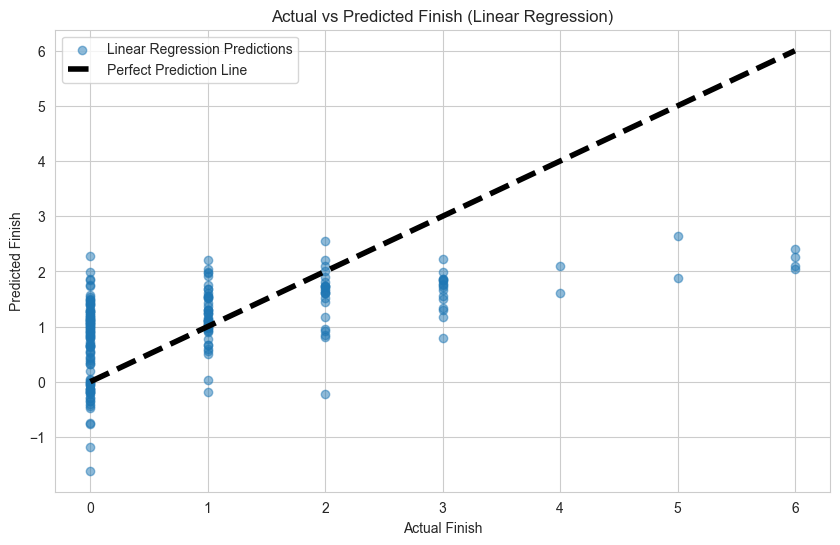

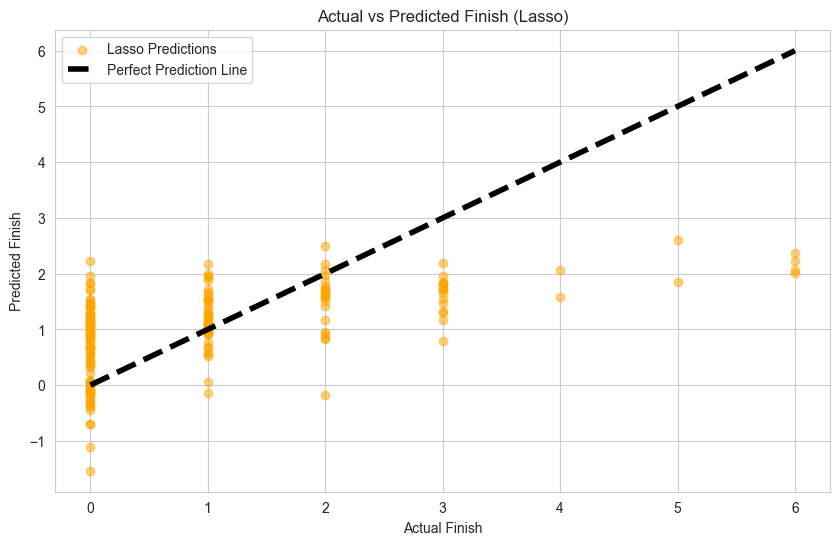

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Plotting the actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Perfect Prediction Line')
plt.xlabel('Actual Finish')
plt.ylabel('Predicted Finish')
plt.title('Actual vs Predicted Finish (Linear Regression)')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='orange', label='Lasso Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, label='Perfect Prediction Line')
plt.xlabel('Actual Finish')
plt.ylabel('Predicted Finish')
plt.title('Actual vs Predicted Finish (Lasso)')
plt.legend()
plt.show()